In [54]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [55]:
df = pd.read_csv('/Users/iqra/Desktop/creditcard.csv')
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [56]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.4,-7.3e-02,2.5,1.4,-3.4e-01,4.6e-01,2.4e-01,9.9e-02,0.4,...,-1.8e-02,2.8e-01,-0.1,6.7e-02,0.1,-0.2,1.3e-01,-2.1e-02,149.6,0
1,0.0,1.2,2.7e-01,0.2,0.4,6.0e-02,-8.2e-02,-7.9e-02,8.5e-02,-0.3,...,-2.3e-01,-6.4e-01,0.1,-3.4e-01,0.2,0.1,-9.0e-03,1.5e-02,2.7,0
2,1.0,-1.4,-1.3e+00,1.8,0.4,-5.0e-01,1.8e+00,7.9e-01,2.5e-01,-1.5,...,2.5e-01,7.7e-01,0.9,-6.9e-01,-0.3,-0.1,-5.5e-02,-6.0e-02,378.7,0
3,1.0,-1.0,-1.9e-01,1.8,-0.9,-1.0e-02,1.2e+00,2.4e-01,3.8e-01,-1.4,...,-1.1e-01,5.3e-03,-0.2,-1.2e+00,0.6,-0.2,6.3e-02,6.1e-02,123.5,0
4,2.0,-1.2,8.8e-01,1.5,0.4,-4.1e-01,9.6e-02,5.9e-01,-2.7e-01,0.8,...,-9.4e-03,8.0e-01,-0.1,1.4e-01,-0.2,0.5,2.2e-01,2.2e-01,70.0,0


In [57]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [58]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 1)
df.loc[:, ['Time', 'Amount']].describe() #only for features that are not anonymized

,Time,Amount
count,284807.0,284807.0
mean,94813.9,88.3
std,47488.1,250.1
min,0.0,0.0
25%,54201.5,5.6
50%,84692.0,22.0
75%,139320.5,77.2
max,172792.0,25691.2


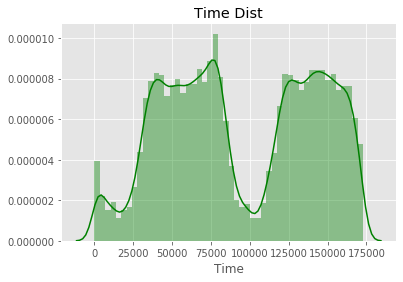

In [59]:
#visualizations of time and amount
plt.figure(figsize=(6,4))
plt.title('Time Dist')
sns.distplot(df.Time, color="g")

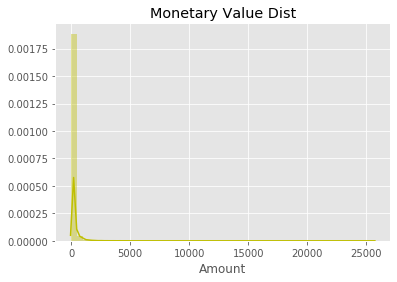

In [60]:
plt.figure(figsize=(6,4))
plt.title('Monetary Value Dist')
sns.distplot(df.Amount, color="y")

In [61]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
print('There were {} non-fraudulent transactions and {} fraudulent transactions.'.format(normal, fraudulent))


There were 284315 non-fraudulent transactions and 492 fraudulent transactions.


Text(0.5, 0, '0:Non-Fraudulent, 1:Fraudulent)')

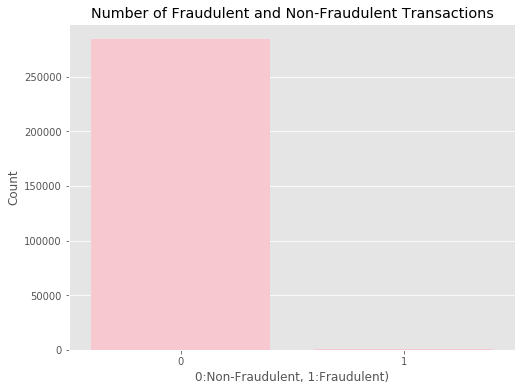

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts, color="pink" )
plt.title('Number of Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1, 'Correlation Heatmap')

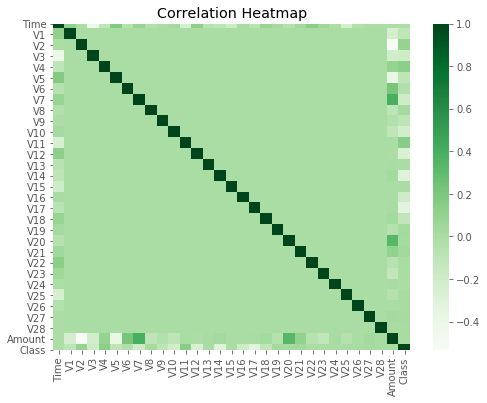

In [63]:

corr = df.corr() #find any correlations
#heatmap
plt.figure(figsize=(8,6))
heat = sns.heatmap(data=corr, cmap="Greens")
plt.title('Correlation Heatmap')

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling the time and amount columns 
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)
print(scaled_time)

scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)
print(scaled_amount)



0        -2.0
1        -2.0
2        -2.0
3        -2.0
4        -2.0
         ... 
284802    1.6
284803    1.6
284804    1.6
284805    1.6
284806    1.6
Length: 284807, dtype: float64
0         2.4e-01
1        -3.4e-01
2         1.2e+00
3         1.4e-01
4        -7.3e-02
           ...   
284802   -3.5e-01
284803   -2.5e-01
284804   -8.2e-02
284805   -3.1e-01
284806    5.1e-01
Length: 284807, dtype: float64


In [65]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
250083,-8.8e-02,2.9e-02,0.1,1.1,0.9,-3.7e-01,0.3,-3.9e-02,-0.7,0.4,...,-5.3e-02,2.6e-01,-4.6e-01,-1.2e+00,5.9e-01,1.9e-01,2.3e-01,0,-0.2,1.3
34919,-6.4e-01,8.7e-01,1.5,-0.2,0.7,-2.9e-02,0.5,2.1e-01,-0.9,-0.7,...,-5.0e-01,-9.7e-02,-3.5e-01,-2.3e-01,1.1e-01,6.3e-02,9.9e-02,0,-0.3,-1.2
207858,2.1e+00,2.1e-01,-2.2,0.2,0.8,-6.6e-01,0.2,-2.8e-01,0.5,-0.5,...,5.9e-01,-8.7e-02,-1.8e-02,3.9e-01,-9.3e-02,-5.4e-03,-3.0e-02,0,-0.3,0.9
2546,-4.2e-01,7.1e-01,1.2,-2.0,0.2,-1.2e+00,1.1,-3.5e-01,0.7,-1.2,...,7.7e-01,-2.3e-01,4.2e-01,-2.7e-02,-8.3e-01,2.6e-01,-1.3e-02,0,-0.3,-2.0
213471,-4.3e+00,-3.6e+00,-1.0,0.3,3.7,-1.7e+00,-0.8,2.7e-01,0.2,-1.3,...,-8.3e-01,-1.4e+00,-8.2e-02,-1.1e-01,-1.5e-01,2.6e-01,-1.0e+00,0,0.1,0.9


In [66]:
#manual train test split using numpy
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]

#resetting index to a default one
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [67]:
no_of_frauds = train.Class.value_counts()[1]
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
167398,-1.9,-2.5e+00,0.6,-1.0,-2.0,2.6e-02,0.4,5.2e-01,-0.3,-0.8,...,-9.3e-02,1.2e+00,-8.8e-02,3.7e-02,-0.4,-2.4e-01,-2.0e-01,0,1.6,0.7
141337,-0.3,1.1e+00,2.0,2.8,0.9,1.1e+00,0.5,7.9e-03,0.3,0.4,...,5.5e-01,-1.5e-01,3.9e-01,-5.2e-01,-0.1,-1.5e-02,-2.8e-02,0,-0.3,0.3
129938,-0.9,9.9e-01,0.9,1.0,0.6,2.1e+00,-0.2,1.2e+00,-0.6,-0.3,...,6.1e-01,-4.7e-02,-1.4e+00,-3.3e-01,-0.1,3.5e-01,1.1e-01,0,-0.3,-0.2
219609,2.2,-1.6e+00,-0.4,-1.6,-1.6,-2.4e-01,-1.5,1.3e-02,-1.2,1.7,...,-4.9e-01,3.6e-01,-4.2e-01,-5.9e-01,-0.4,3.3e-02,-4.1e-02,0,-0.2,1.2
246503,2.0,8.4e-02,-2.0,0.3,0.7,-5.4e-01,0.3,-2.6e-01,0.4,-0.4,...,-9.9e-01,2.3e-01,1.6e-02,-1.7e-01,0.2,-6.5e-02,-2.7e-02,0,-0.2,1.5


In [68]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
subsample = pd.concat([selected, fraud])
len(subsample)

872

In [69]:
#shuffling the data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)
#now the number of fradulent and non-fraduent cases are equal

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.3,1.0,2.9e-02,-8.4e-01,5.5e-01,-6.5e-01,8.5e-01,-4.5e-02,3.4e-02,0.2,...,-0.6,4.3e-02,-3.6e-01,-4.5e-01,0.1,2.0e-01,1.6e-01,0,-3.4e-01,1.6e+00
1,-22.6,13.2,-2.5e+01,6.2e+00,-1.7e+01,-4.5e+00,-1.7e+01,1.5e+01,-3.9e+00,-8.6,...,-1.6,-1.0e+00,1.4e-01,1.6e+00,-0.2,1.5e+00,4.5e-01,1,4.7e-02,-1.4e+00
2,-6.8,5.4,-1.0e+01,9.1e+00,-8.0e+00,-2.3e+00,-1.0e+01,4.2e+00,-5.3e+00,-11.1,...,-0.3,4.3e-01,6.7e-01,-7.8e-01,-0.2,1.2e+00,2.0e-01,1,4.8e-01,-2.0e-02
3,1.2,-0.7,-2.7e-01,-5.9e-01,-6.0e-01,-3.5e-01,-4.9e-01,-1.1e-02,-7.9e-01,0.3,...,-0.3,-1.8e-01,-4.4e-01,4.9e-01,-0.3,-1.1e-03,3.5e-02,1,3.9e-02,-6.1e-01
4,2.0,-0.3,-1.3e+00,2.3e-01,-1.0e-01,-7.2e-01,-8.3e-02,-3.2e-02,6.6e-01,0.3,...,-0.8,3.1e-01,-4.7e-01,-3.5e-01,0.2,-9.0e-02,-7.9e-02,0,-3.5e-01,1.6e+00
5,-3.0,0.3,-9.0e-02,1.5e+00,-1.4e+00,-1.1e+00,4.4e-01,5.8e-01,-5.8e-01,-0.3,...,0.3,-4.8e-01,9.7e-01,-2.5e-01,-0.4,-8.4e-01,-1.8e-01,0,4.0e-01,-6.9e-01
6,-1.7,-1.3,3.1e-01,5.4e-02,-5.9e-02,7.1e-02,6.9e-01,-3.1e-01,-6.5e-01,0.5,...,-0.6,-4.2e-01,-4.0e-01,-1.6e-03,-0.5,3.2e-02,6.6e-02,1,9.3e-01,-5.7e-01
7,-14.7,7.9,-2.2e+01,1.2e+01,-8.3e+00,-2.3e+00,-1.6e+01,7.8e-02,-6.4e+00,-13.3,...,1.1,1.0e+00,-1.0e+00,-2.5e-01,0.6,2.2e+00,-1.4e+00,1,-3.5e-01,-1.6e+00
8,2.1,0.1,-1.9e+00,1.8e-01,7.3e-01,-2.7e-01,8.7e-02,-7.2e-02,2.3e-01,-0.2,...,-0.9,2.7e-01,3.1e-03,-2.2e-01,0.2,-6.5e-02,-4.5e-02,0,-3.5e-01,5.6e-01
9,-1.4,2.3,-9.7e-01,4.4e-01,1.1e-01,-7.0e-01,9.0e-01,2.3e-02,7.8e-01,2.1,...,0.3,-2.8e-02,-4.9e-01,-4.1e-01,-0.4,1.2e-01,-3.1e-01,0,-2.3e-01,-8.8e-01


In [70]:
corr = subsample.corr()
corr = corr[['Class']]
#finding negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.6
V9,-0.5
V10,-0.6
V12,-0.7
V14,-0.8
V16,-0.6
V17,-0.6


In [71]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V2,0.5
V4,0.7
V11,0.7
Class,1.0


In [72]:
#Only removing extreme outliers that are more than 2.5 times the interquartile range. We have picked a large threshold
#because the dataset is already small enough so we are only getting rid of drastic extremes.
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [73]:
after = len(df2)
before = len(subsample)
difference = before - after
print('We reduced our data size from {} transactions to {} transactions. The difference is {} transactions'.format(before, after, difference))

We reduced our data size from 872 transactions to 617 transactions. The difference is 255 transactions


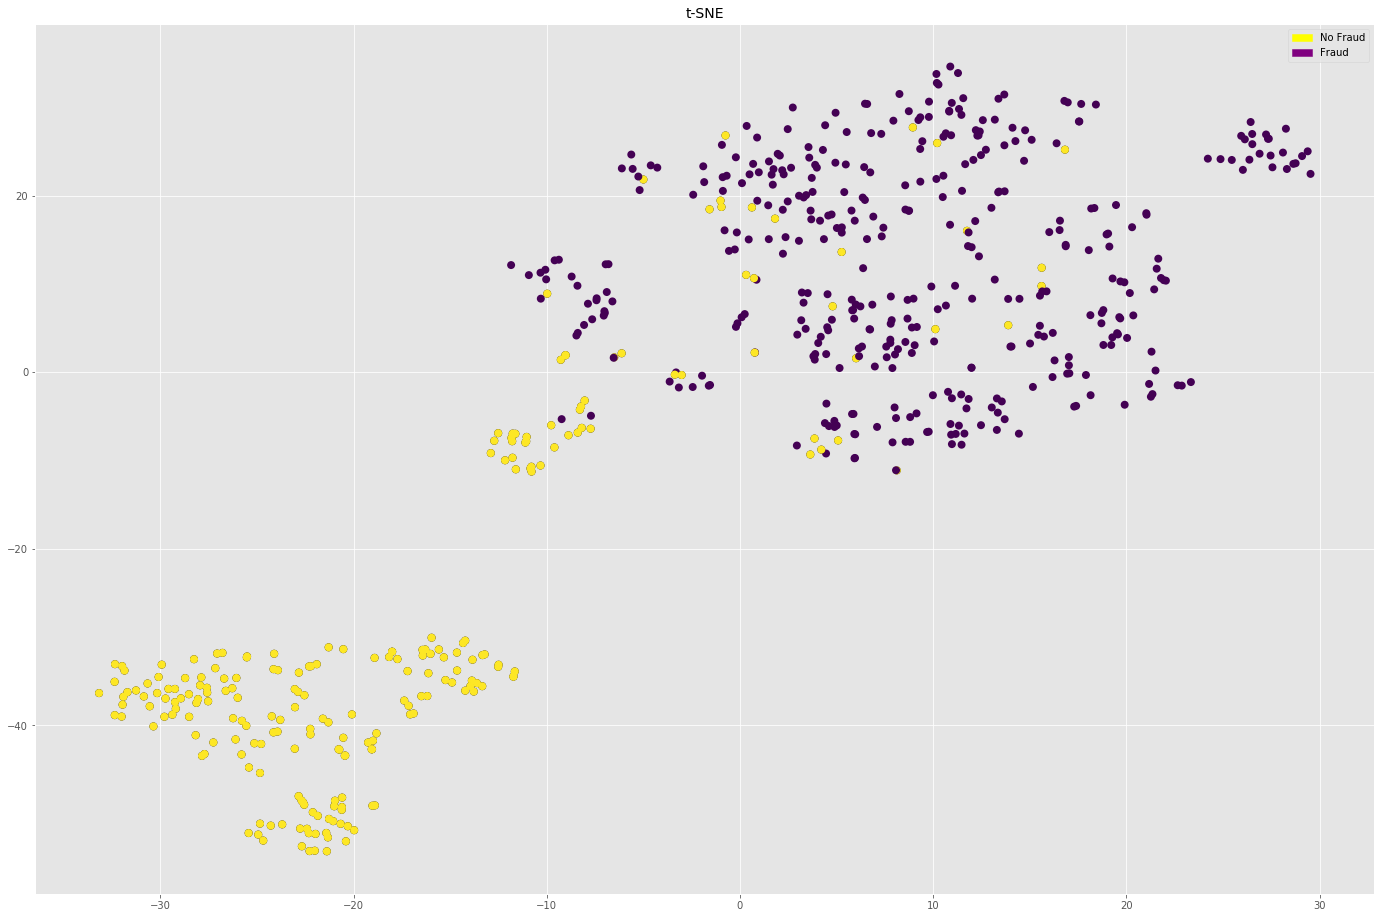

In [74]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

#t-SNE
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


yel_patch = mpatches.Patch(color='yellow', label='No Fraud')
purp_patch = mpatches.Patch(color='purple', label='Fraud')

ax.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 0), cmap ='hot'  ,label='No Fraud', linewidths=2)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 1),label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[yel_patch, purp_patch])

In [75]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [76]:
import warnings
warnings.filterwarnings('ignore')
#Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.977443 (0.027951)
LDA: 0.969104 (0.027403)
KNN: 0.952835 (0.035227)
CART: 0.875958 (0.043797)
SVM: 0.976850 (0.017696)
RF: 0.967295 (0.026577)


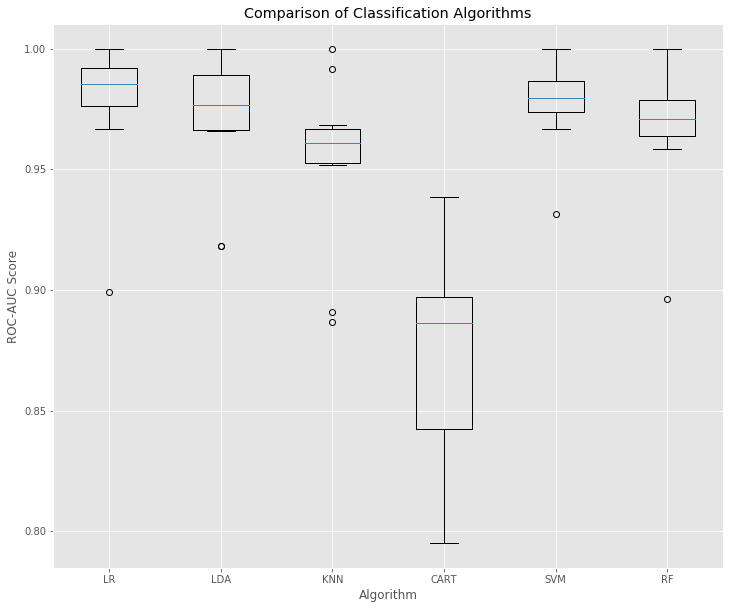

In [77]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot()
ax.set_xticklabels(names)
plt.show()

In [83]:
import graphviz

from sklearn.tree import plot_tree
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]
dotfile = open("/Users/iqra/Desktop/tree.dot", 'w')

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file = dotfile, 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
dotfile.close()



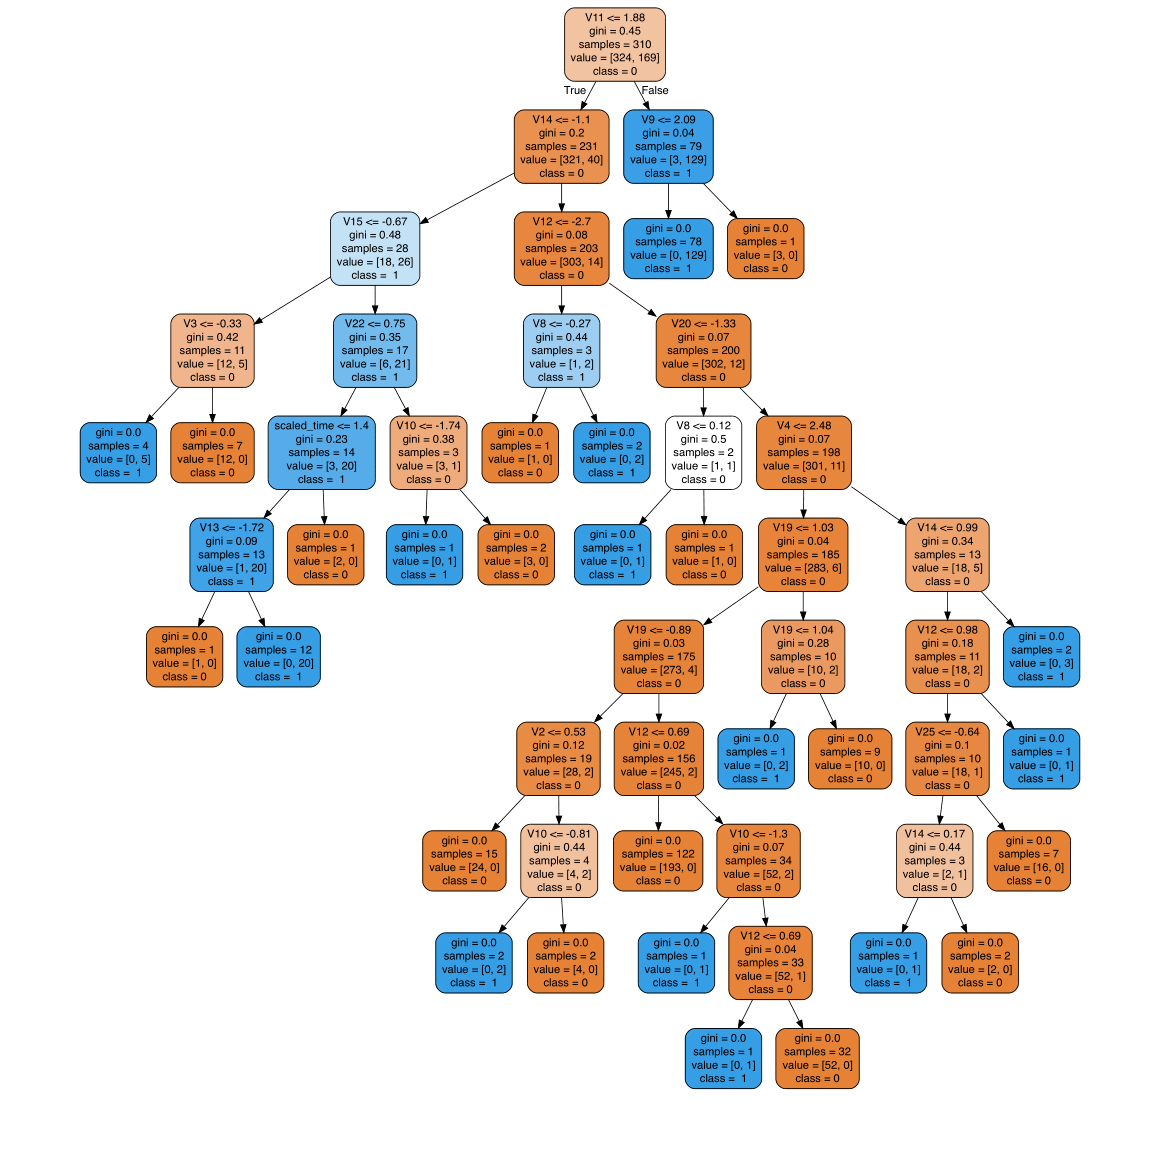

In [91]:
# I converted the dot format into ong using webgraphviz. To display in jupyter notebook:
from IPython.display import Image

fig = Image(filename=('/Users/iqra/Desktop/Webgraphviz.png'))
fig
